## Clothing Recognizer

### Import necessary libraries

In [1]:
!pip install mlxtend

  Using cached mlxtend-0.17.2-py2.py3-none-any.whl (1.3 MB)


In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

### Load fashion dataset

In [5]:
dataset = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()
print("shape of X_train:", X_train.shape)
print("shape of Y_trai:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test", Y_test.shape)

shape of X_train: (60000, 28, 28)
shape of Y_trai: (60000,)
shape of X_test: (10000, 28, 28)
shape of Y_test (10000,)


### Data preprocessing

In [6]:
class_names=['top', 'trouser', 'pullover', 'dress', 'coat',' sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

normalize data

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

sample data

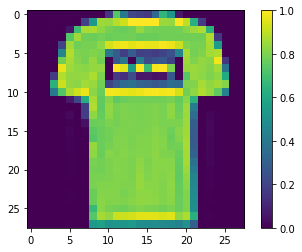

In [8]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Model Building and Compilation

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 377us/sample - loss: 0.5028 - accuracy: 0.8205 - val_loss: 0.4872 - val_accuracy: 0.8324
Epoch 2/10
48000/48000 [==============================] - 16s 324us/sample - loss: 0.3767 - accuracy: 0.8608 - val_loss: 0.3713 - val_accuracy: 0.8658
Epoch 3/10
48000/48000 [==============================] - 16s 333us/sample - loss: 0.3368 - accuracy: 0.8767 - val_loss: 0.3321 - val_accuracy: 0.8814
Epoch 4/10
48000/48000 [==============================] - 17s 348us/sample - loss: 0.3140 - accuracy: 0.8848 - val_loss: 0.3395 - val_accuracy: 0.8793
Epoch 5/10
48000/48000 [==============================] - 18s 366us/sample - loss: 0.2974 - accuracy: 0.8887 - val_loss: 0.3411 - val_accuracy: 0.8769
Epoch 6/10
48000/48000 [==============================] - 19s 386us/sample - loss: 0.2822 - accuracy: 0.8954 - val_loss: 0.3224 - val_accuracy: 0.8847
Epoch 7/10
48000/48000 [====================

In [11]:
Y_pred = model.predict_classes(X_test)
accuracy_score(Y_test, Y_pred)

0.8786

### Plotting Learning Curve

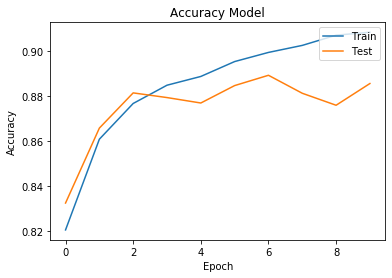

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

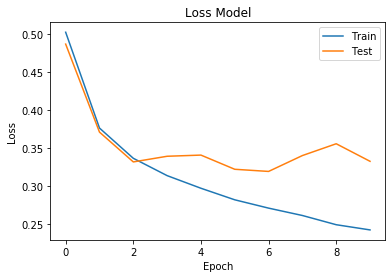

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

### Plotting Confusion Matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b60db84f08>)

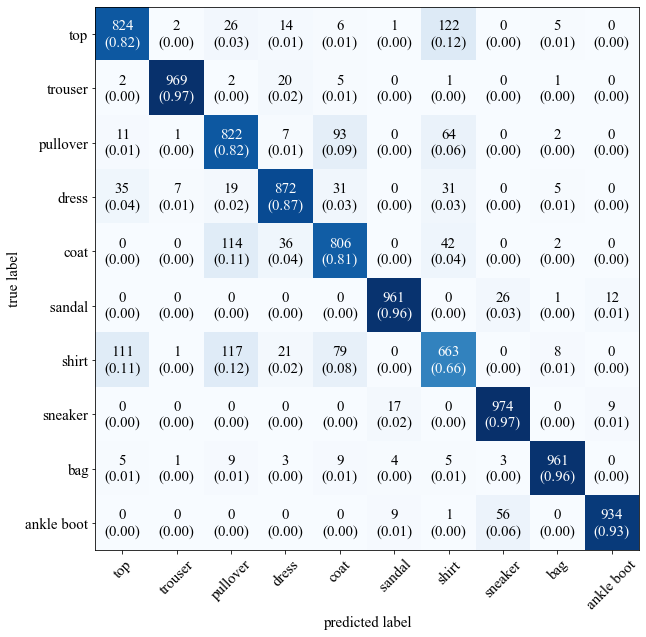

In [21]:
mat = confusion_matrix(Y_test, Y_pred)
font = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 15,
}
matplotlib.rc('font', **font)
plot_confusion_matrix(conf_mat=mat, figsize=(10,10), class_names=class_names, show_normed=True)